<a href="https://colab.research.google.com/github/blaewood/Python_AI_Programming/blob/main/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/12
469/469 - 148s - loss: 2.0976 - accuracy: 0.2336 - val_loss: 1.1641 - val_accuracy: 0.6489 - 148s/epoch - 315ms/step
Epoch 2/12
469/469 - 143s - loss: 0.9287 - accuracy: 0.6730 - val_loss: 0.6244 - val_accuracy: 0.7679 - 143s/epoch - 304ms/step
Epoch 3/12
469/469 - 141s - loss: 0.6689 - accuracy: 0.7582 - val_loss: 0.5462 - val_accuracy: 0.7992 - 141s/epoch - 301ms/step
Epoch 4/12
469/469 - 143s - loss: 0.6028 - accuracy: 0.7796 - val_loss: 0.5180 - val_accuracy: 0.8112 - 143s/epoch - 304ms/step
Epoch 5/12
469/469 - 142s - loss: 0.5607 - accuracy: 0.7959 - val_loss: 0.4888 - val_accuracy: 0.8199 - 142s/epoch - 303ms/step
Epoch 6/12
469/469 - 143s - loss: 0.5330 - accuracy: 0.8049 - val_loss: 0.4705 - val_accuracy: 0.8254 - 143s/epoch - 305ms/step
Epoch 7/12
469/469 - 142s - loss: 0.5013 - accuracy: 0.8182 - val_loss: 0.4471 - val_accuracy: 0.8394 - 142s/epoch - 303ms/step
Epoch 8/12
469/469 - 143s - loss: 0.4740 

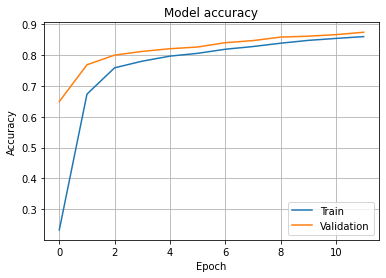

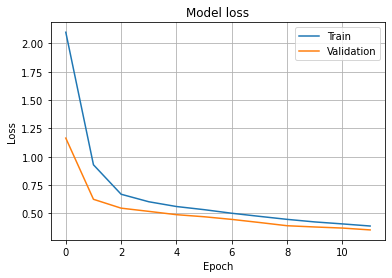

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='sigmoid',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='sigmoid'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='sigmoid'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()